In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [10]:
X = adult.data.features
y = adult.data.targets

In [ ]:
categorical_cols = X.columns[X.dtypes == 'object'].tolist()
numerical_cols = X.columns[X.dtypes != 'object'].tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [ ]:
svm_model = SVC(probability=True)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', svm_model)])

In [ ]:
param_grid = {
    'model__C': [0.1, 1, 10],
    'model__gamma': ['scale', 'auto'],
    'model__kernel': ['linear', 'rbf', 'poly'],
}

In [ ]:
# Loop over the samples
n_samples = 10
sample_size = 1000

In [12]:
categorical_features = X.select_dtypes(include=['object', 'category']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC())])

# Define the grid of parameters to search over
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': ['scale', 'auto'],
    'classifier__kernel': ['linear', 'rbf', 'poly']
}

best_accuracy = 0
best_params = None
results = []

# Generate 10 samples and perform GridSearchCV on each
for i in range(10):
    # Create a stratified random sample
    X_sample, _, y_sample, _ = train_test_split(X, y, train_size=1000, stratify=y, random_state=i)

    # Split the sample into a training and a testing set
    X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=i)
    y_train
    y_test

    # Perform Grid Search
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=0)
    grid_search.fit(X_train, y_train)

    # Calculate test set accuracy
    test_accuracy = grid_search.score(X_test, y_test)

    # Update the best accuracy and parameters if the current model is better
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_params = grid_search.best_params_

    # Store the results
    results.append({
        'sample': i+1,
        'best_accuracy': best_accuracy,
        'best_params': best_params
    })

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [13]:
results_df = pd.DataFrame(results)

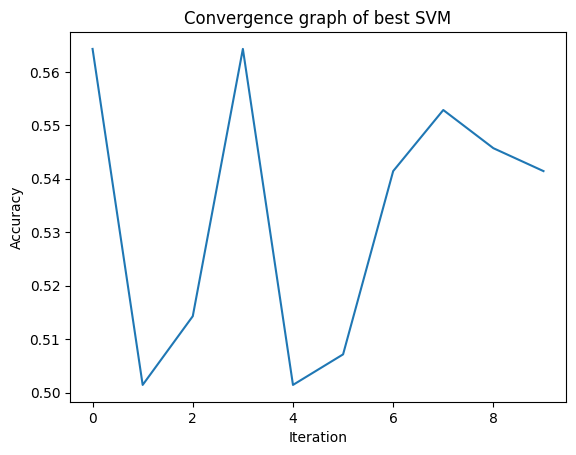

In [26]:
plt.plot([i for i in range(10)], [grid_search.cv_results_['mean_test_score'][i] for i in range(10)])
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Convergence graph of best SVM')
plt.show()

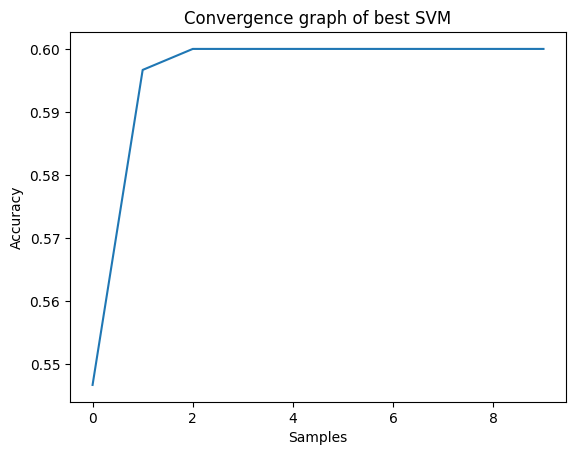

In [27]:
plt.plot([i for i in range(10)], [results_df['best_accuracy'][i] for i in range(10)])
plt.xlabel('Samples')
plt.ylabel('Accuracy')
plt.title('Convergence graph of best SVM')
plt.show()